# Data Cleaning

## Look Into Data

In [321]:
# Open File
import pandas as pd

df_netflix = pd.read_csv("netflix_titles.csv")
df_netflix


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Missing data

In [322]:
missing_val=df_netflix.isnull().sum()
missing_ratio=(missing_val/len(df_netflix))
missing_ratio

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

missing data:
kolom direktur (29,9%), cast(9%), country(9%), date_added(0,1%), rating (0.0454%), duration        (0.0341%)


In [323]:
df_dtypes = pd.DataFrame(df_netflix.dtypes)
df_dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [324]:
str_cols = list(df_netflix.columns)
# mengecualikan kolom release_year
str_cols.remove('release_year')

# removing leading and trailing characters from columns with str type
for i in str_cols:
    df_netflix[i] = df_netflix[i].str.strip()
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [325]:
# df_netflix_temp = df_netflix.dropna()
# df_netflix_temp

columns = ['director', 'cast', 'country', 'rating', 'date_added']

# looping through the columns to fill the entries with NaN values with ""
for column in columns:
    df_netflix[column] = df_netflix[column].fillna("Unknown")

In [326]:
print(df_netflix["type"].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [327]:
df_movie = df_netflix[df_netflix["type"] == "Movie"]
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [328]:
def getDuration(data):
    count = 0
    durations = []
    for value in data:
	# filling in missing values
        if type(value) is float:
            durations.append(0)
        else:
            values = value.split(" ")
            durations.append(int(values[0]))
    return durations

df_movie.rename(columns={"duration": "duration_del"}, inplace=True)

df_movie.insert(11, 'duration', getDuration(df_movie['duration_del']))
df_movie = df_movie.drop(['duration_del'], axis = 1)
df_movie.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\1172706160.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.rename(columns={"duration": "duration_del"}, inplace=True)


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,duration,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,Documentaries,90,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,Children & Family Movies,91,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies",125,"On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",104,A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",127,After most of her family is murdered in a terr...


In [329]:
movie_missing_val=df_movie.isna().sum()
movie_missing_ratio=(movie_missing_val/len(df_movie))
movie_missing_ratio

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
listed_in       0.0
duration        0.0
description     0.0
dtype: float64

In [330]:
rows_with_nan_in_director = df_movie[df_movie['duration'].isnull()]
# Display the rows where 'director' is NaN
pd.DataFrame(rows_with_nan_in_director)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,duration,description


In [331]:
# get index for wrong rating
index = df_movie[df_movie['rating'].isin(['74 min', '84 min', '66 min'])].index

for i in index:
   split_value = df_movie['rating'].loc[i].split(" ")
   duration = split_value[0]
   df_movie['duration'].loc[i] = duration
   df_movie['rating'].loc[i] = "NR"

C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\4098942560.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration'].loc[i] = duration
C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\4098942560.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '74' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_movie['duration'].loc[i] = duration
C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\4098942560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['rating'].loc[i] = "NR"
C:\Users\ACER\

In [332]:
df_movie.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,duration,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,Movies,74,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,Movies,84,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,Movies,66,The comic puts his trademark hilarious/thought...


In [333]:
movie_missing_val=df_movie.isna().sum()
movie_missing_ratio=(movie_missing_val/len(df_movie))
movie_missing_ratio

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
listed_in       0.0
duration        0.0
description     0.0
dtype: float64

In [334]:
print("Rating value: ", pd.DataFrame(df_movie['rating'].unique()))
print("Duration value: ", pd.DataFrame(df_movie['duration'].unique()))
print("Country value: ", pd.DataFrame(df_movie['country'].unique()))

Rating value:             0
0      PG-13
1         PG
2      TV-MA
3      TV-PG
4      TV-14
5       TV-Y
6          R
7       TV-G
8      TV-Y7
9          G
10     NC-17
11        NR
12   Unknown
13  TV-Y7-FV
14        UR
Duration value:         0
0     90
1     91
2    125
3    104
4    127
..   ...
203  228
204   18
205  205
206  201
207  191

[208 rows x 1 columns]
Country value:                                                       0
0                                        United States
1                                              Unknown
2    United States, Ghana, Burkina Faso, United Kin...
3                              Germany, Czech Republic
4                                                India
..                                                 ...
647         France, Netherlands, South Africa, Finland
648                      Egypt, Austria, United States
649                                      Russia, Spain
650              Croatia, Slovenia, Serbia, Montenegro
651    

In [335]:
# fixing the entries
for i in range(len(df_movie)):
    if df_movie['rating'].iloc[i] == "UR":
        df_movie['rating'].iloc[i] = "NR"
        
# double checking
print(pd.DataFrame(df_movie['rating'].unique()))
df_movie[df_movie['rating'] == "UR"]

           0
0      PG-13
1         PG
2      TV-MA
3      TV-PG
4      TV-14
5       TV-Y
6          R
7       TV-G
8      TV-Y7
9          G
10     NC-17
11        NR
12   Unknown
13  TV-Y7-FV


C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\2171600004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['rating'].iloc[i] = "NR"
C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\2171600004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['rating'].iloc[i] = "NR"
C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\2171600004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['rating'].iloc[i] = "NR"


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,duration,description


In [336]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,duration,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,Documentaries,90,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,Children & Family Movies,91,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies",125,"On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",104,A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",127,After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers",96,Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers",158,"A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,"Comedies, Horror Movies",88,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies",88,"Dragged from civilian life, a former superhero..."


In [337]:
# function to get unique values of a column
def getUnique(data):
    unique_values = set()
    for value in data:
        if type(value) is float:
            unique_values.add(None)
        else:
            values = value.split(", ")
            for i in values:
                unique_values.add(i)
    return list(unique_values)
unique_countries = getUnique(df_movie['country'])
unique_countries


['',
 'Pakistan',
 'Afghanistan',
 'Bahamas',
 'Finland',
 'Iran',
 'United Kingdom,',
 'Botswana',
 'Cayman Islands',
 'South Africa',
 'United States,',
 'Israel',
 'Germany',
 'Jamaica',
 'Algeria',
 'Iceland',
 'East Germany',
 'Senegal',
 'South Korea',
 'Mexico',
 'West Germany',
 'Thailand',
 'Mauritius',
 'Ethiopia',
 'Colombia',
 'Nepal',
 'Japan',
 'Nicaragua',
 'Soviet Union',
 'Zimbabwe',
 'Czech Republic',
 'New Zealand',
 'Turkey',
 'Venezuela',
 'Palestine',
 'Canada',
 'Singapore',
 'Egypt',
 'Malawi',
 'Greece',
 'Hong Kong',
 'Chile',
 'Italy',
 'Austria',
 'Kazakhstan',
 'Netherlands',
 'Bulgaria',
 'Paraguay',
 'United States',
 'Slovenia',
 'Bermuda',
 'Serbia',
 'Cambodia',
 'Australia',
 'Taiwan',
 'Unknown',
 'Luxembourg',
 'Argentina',
 'Indonesia',
 'Lithuania',
 'Burkina Faso',
 'Kenya',
 'Sudan',
 'Morocco',
 'Vietnam',
 'Cameroon',
 'Portugal',
 'Philippines',
 'India',
 'Peru',
 'Qatar',
 'Poland',
 'France',
 'Malaysia',
 'Malta',
 'Vatican City',
 'Niger

In [338]:
df_movie["country"].value_counts()

country
United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: count, Length: 652, dtype: int64

# Data Integration

In [339]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example of encoding 'rating' using LabelEncoder
le = LabelEncoder()
df_movie['rating_encoded'] = le.fit_transform(df_movie['rating'])
df_movie

# One-hot encoding for 'genre' (assuming it can be multi-categorical)
#df_movie = pd.get_dummies(df_movie, columns=['genre'], drop_first=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,duration,description,rating_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,Documentaries,90,"As her father nears the end of his life, filmm...",4
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,Children & Family Movies,91,Equestria's divided. But a bright-eyed hero be...,3
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies",125,"On a photo shoot in Ghana, an American model s...",8
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,"Comedies, Dramas",104,A woman adjusting to life after a loss contend...,4
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,"Dramas, International Movies",127,After most of her family is murdered in a terr...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,"Dramas, International Movies, Thrillers",96,Recovering alcoholic Talal wakes up inside a s...,8
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,"Cult Movies, Dramas, Thrillers",158,"A political cartoonist, a crime reporter and a...",5
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,"Comedies, Horror Movies",88,Looking to survive in a world taken over by zo...,5
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,"Children & Family Movies, Comedies",88,"Dragged from civilian life, a former superhero...",3


In [340]:
# Example of selecting numerical columns for correlation analysis
df_numeric = df_movie[['duration', 'release_year', 'rating_encoded']]

In [341]:
# Covariance matrix
covariance_matrix = df_numeric.cov()

print(covariance_matrix)

                  duration  release_year  rating_encoded
duration        800.296060    -56.484327      -14.063155
release_year    -56.484327     93.666961        4.852999
rating_encoded  -14.063155      4.852999        4.041831


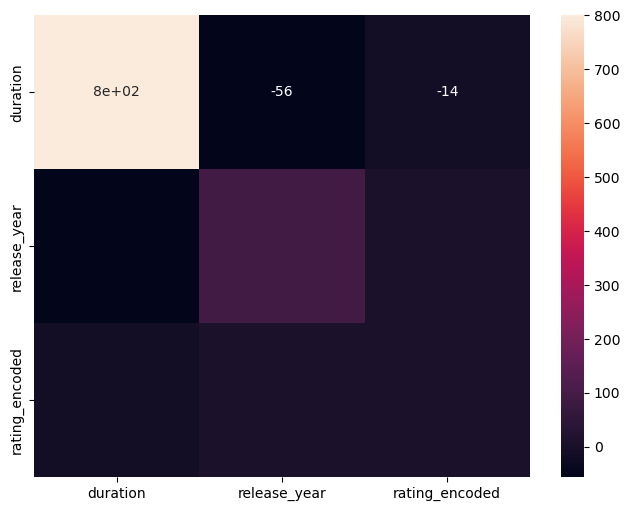

In [348]:
plt.figure(figsize=(8,6))
sns.heatmap(covariance_matrix, annot=True)
plt.show()

In [342]:
# Correlation matrix
correlation_matrix = df_numeric.corr()

print(correlation_matrix)

                duration  release_year  rating_encoded
duration        1.000000     -0.206305       -0.247268
release_year   -0.206305      1.000000        0.249418
rating_encoded -0.247268      0.249418        1.000000


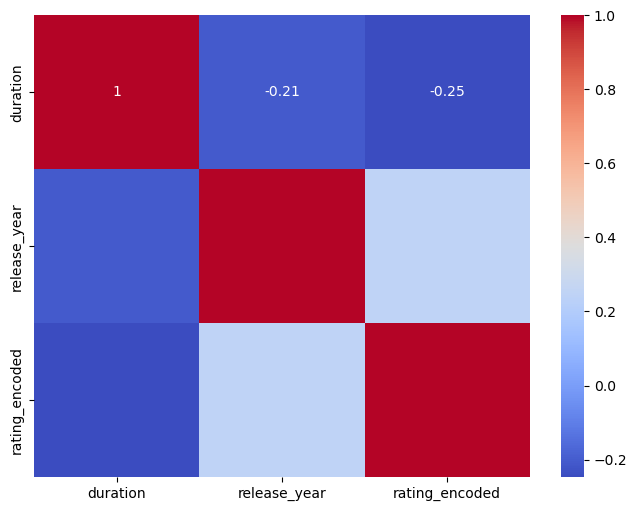

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [345]:
def getUniqueCount(data):
    unique_count = {}  # A dictionary to store unique values and their counts

    for value in data:
        if isinstance(value, float):  # Handle NaN or None values
            if None not in unique_count:
                unique_count[None] = 0
            unique_count[None] += 1
        else:
            values = value.split(", ")  # Split by ", " to handle multiple values
            for i in values:
                if i not in unique_count:
                    unique_count[i] = 0
                unique_count[i] += 1  # Increment the count for each genre

    # Convert the dictionary to a DataFrame
    df_unique_count = pd.DataFrame(list(unique_count.items()), columns=['Value', 'Count'])
    return df_unique_count


In [346]:
def getTopGenres(data, top_n=10):
    df_unique_count = getUniqueCount(data)  # Dapatkan DataFrame dari fungsi getUnique
    top_genres = df_unique_count.nlargest(top_n, 'Count')  # Ambil 10 genre terbanyak
    return top_genres

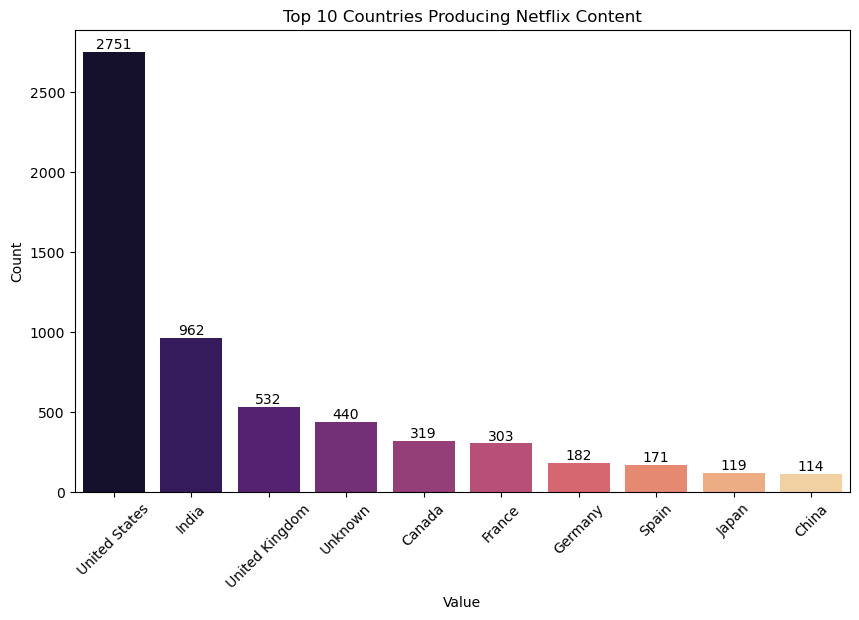

In [349]:
plt.figure(figsize=(10, 6))
top_10_countries = getTopGenres(df_movie["country"])
sns.barplot(x=top_10_countries.Value, y=top_10_countries.Count, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xticks(rotation=45)
for i, count in enumerate(top_10_countries.Count):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()


# Data Reduction

In [356]:
df_movie.shape

(6131, 15)

In [358]:
df_movie_labels = df_numeric

In [359]:
df_movie_labels.shape

(6131, 3)

In [350]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [351]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [362]:
df_scaled.shape

(6131, 3)

In [364]:
import numpy as np
np.mean(df_scaled), np.std(df_scaled)

(3.2511975556771615e-15, 1.0)

In [365]:
feat_cols = ['feature' + str(i) for i in range(df_scaled.shape[1])]

In [366]:
normalised_breast = pd.DataFrame(df_scaled,columns=feat_cols)

In [367]:
normalised_breast.tail()

,feature0,feature1,feature2
6126,-0.126029,0.194111,0.677650
6127,2.065776,-0.632559,-0.814689
6128,-0.408842,-0.425891,-0.814689
6129,-0.408842,-0.735893,-1.809582
6130,0.404247,0.194111,-0.317243


In [368]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(df_scaled)

In [369]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [370]:
principal_breast_Df.tail()

,principal component 1,principal component 2
6126,-0.587372,-0.056082
6127,2.014315,-1.026476
6128,0.498650,0.603299
6129,1.270621,0.835706
6130,0.308491,-0.419877


In [371]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.48973293 0.26457337]


C:\Users\ACER\AppData\Local\Temp\ipykernel_17616\3008750471.py:3: UserWarning: 
The palette list has fewer values (10) than needed (73) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


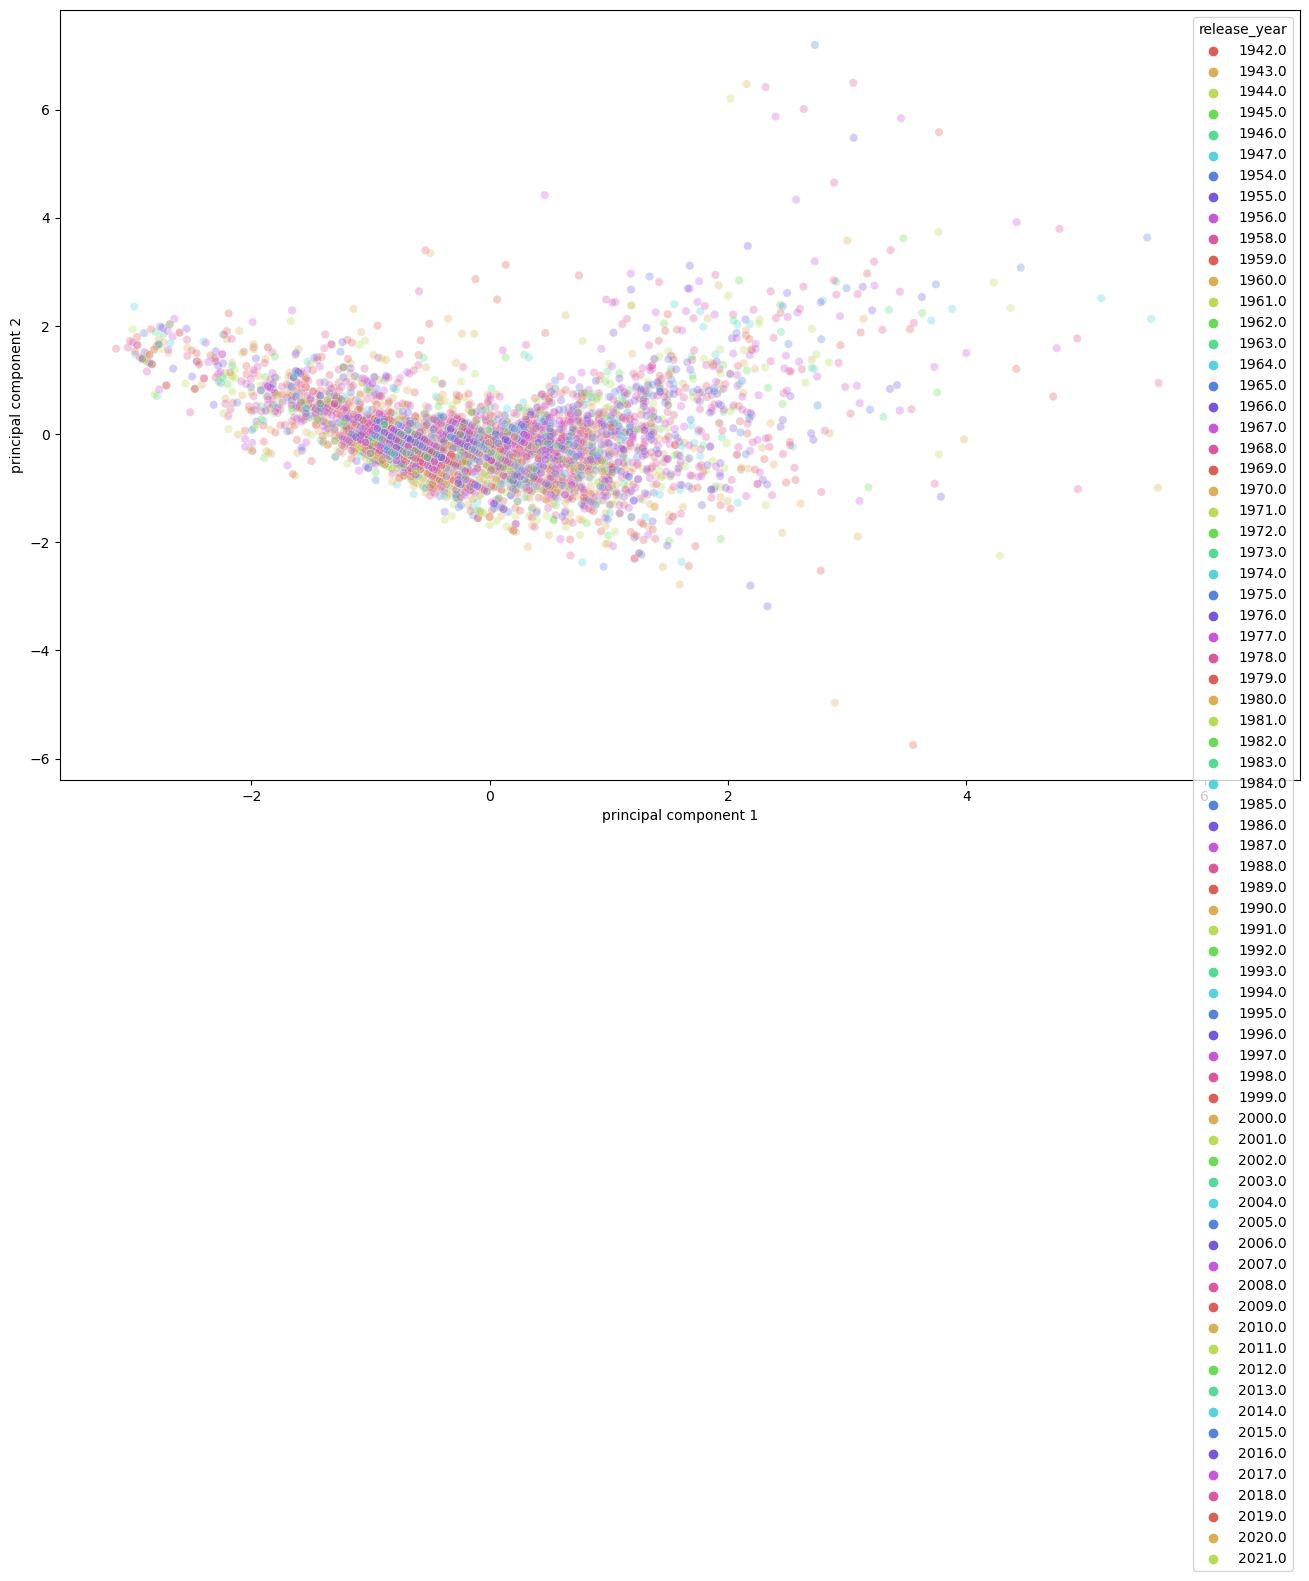

In [388]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue=df_movie["release_year"],
    palette=sns.color_palette("hls", 10),
    data=principal_breast_Df,
    legend="full",
    alpha=0.3
)
plt.savefig('foo.png')



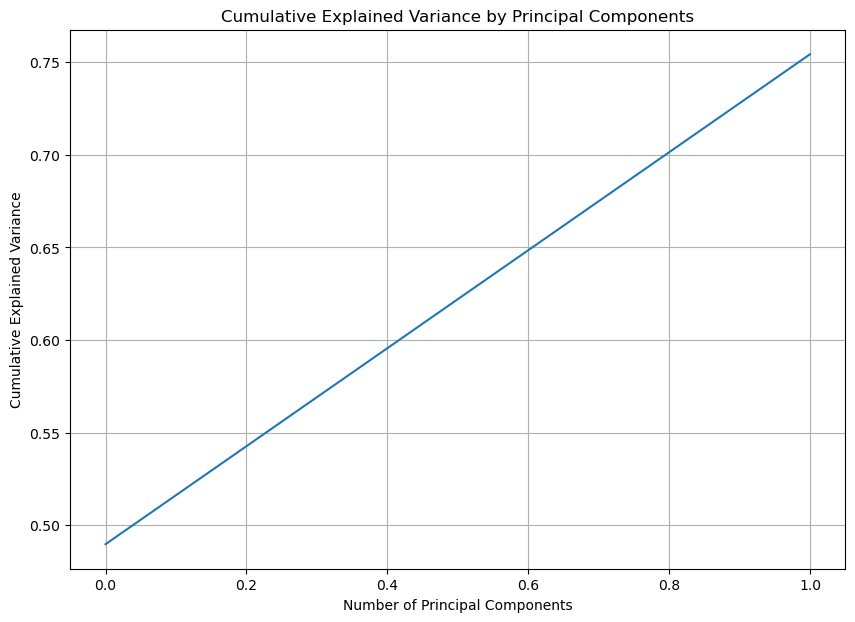

In [389]:
explained_variance_ratio = pca_breast.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Step 4: Plot the Cumulative Explained Variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [390]:
cumulative_variance

array([0.48973293, 0.7543063 ])

In [353]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Add the principal components to the original dataset for further analysis
df_movie['PC1'] = df_pca['PC1']
df_movie['PC2'] = df_pca['PC2']


Explained variance ratio: [0.48973293 0.26457337]


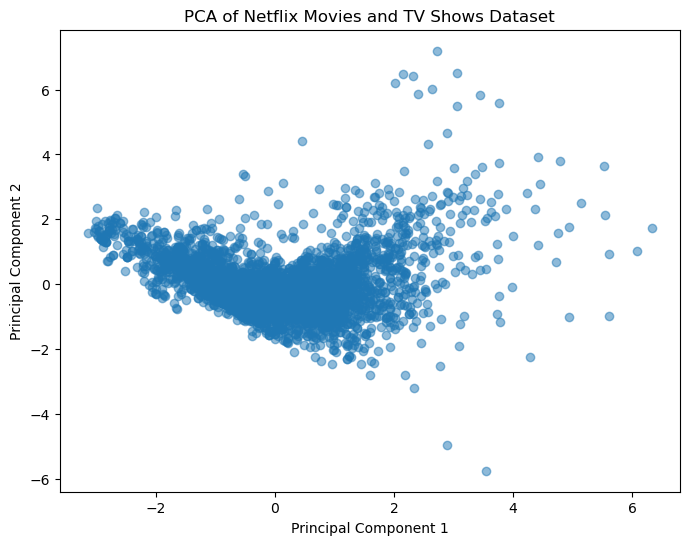

In [354]:
import matplotlib.pyplot as plt

# Scatter plot to visualize the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_movie['PC1'], df_movie['PC2'], alpha=0.5)
plt.title('PCA of Netflix Movies and TV Shows Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [355]:
# Apply PCA with enough components to explain 95% of variance
pca = PCA(n_components=0.95)  # Retain components that explain 95% of the variance
principal_components = pca.fit_transform(df_scaled)

# Explained variance ratio
print("Explained variance for each component:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

Explained variance for each component: [0.48973293 0.26457337 0.2456937 ]
Number of components selected: 3
